<a href="https://colab.research.google.com/github/hanan99/House-pricing/blob/main/Real-state.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import zipfile
import PIL
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras import layers, Sequential
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,AveragePooling2D, Flatten, Dense, Dropout, Activation , Concatenate, Input , BatchNormalization, concatenate
%matplotlib inline

In [ ]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/data2'

desc.csv  pics.zip


In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/data2/desc.csv', index_col=0)
df.shape

(15474, 7)

In [ ]:
df.head(200)

street                    city  ...  sqft   price
image_id                                                   ...              
0           1317 Van Buren Avenue         Salton City, CA  ...  1560  201900
1                  124 C Street W             Brawley, CA  ...   713  228500
2                 2304 Clark Road            Imperial, CA  ...   800  273950
3              755 Brawley Avenue             Brawley, CA  ...  1082  350000
4           2207 R Carrillo Court            Calexico, CA  ...  2547  385100
...                           ...                     ...  ...   ...     ...
195             9950 Karen Avenue     California City, CA  ...  2214  314900
196              2325 Cypress Way  Pine Mountain Club, CA  ...  1728  299000
197       1241 N Mayflower Circle          Ridgecrest, CA  ...  2608  339900
198         9705 Bossa Nova Court         Bakersfield, CA  ...  1840  324999
199           18611 Mustang Drive           Tehachapi, CA  ...  3046  349000

[200 rows x 7 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 0 to 15473
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   street  15474 non-null  object 
 1   city    15474 non-null  object 
 2   n_city  15474 non-null  int64  
 3   bed     15474 non-null  int64  
 4   bath    15474 non-null  float64
 5   sqft    15474 non-null  int64  
 6   price   15474 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 967.1+ KB


In [ ]:
 !unzip '/content/drive/My Drive/data2/pics.zip' -d '/content/drive/My Drive/data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/data/pics/5499.jpg  
  inflating: /content/drive/My Drive/data/pics/55.jpg  
  inflating: /content/drive/My Drive/data/pics/550.jpg  
  inflating: /content/drive/My Drive/data/pics/5500.jpg  
  inflating: /content/drive/My Drive/data/pics/5501.jpg  
  inflating: /content/drive/My Drive/data/pics/5502.jpg  
  inflating: /content/drive/My Drive/data/pics/5503.jpg  
  inflating: /content/drive/My Drive/data/pics/5504.jpg  
  inflating: /content/drive/My Drive/data/pics/5505.jpg  
  inflating: /content/drive/My Drive/data/pics/5506.jpg  
  inflating: /content/drive/My Drive/data/pics/5507.jpg  
  inflating: /content/drive/My Drive/data/pics/5508.jpg  
  inflating: /content/drive/My Drive/data/pics/5509.jpg  
  inflating: /content/drive/My Drive/data/pics/551.jpg  
  inflating: /content/drive/My Drive/data/pics/5510.jpg  
  inflating: /content/drive/My Drive/data/pics/5511.jpg  
  inflating: /content/dri

In [ ]:
df.isna().sum()

street    0
city      0
n_city    0
bed       0
bath      0
sqft      0
price     0
dtype: int64

In [ ]:
df['fullbath'] = df.apply(lambda x: int(str(x['bath']).split('.')[0]), axis = 1)
df['halfbath'] =df.apply(lambda x: int(str(x['bath']).split('.')[1]), axis = 1)
df = df.drop(['bath'], axis=1)
df.head(200)

street                    city  ...  fullbath  halfbath
image_id                                                   ...                    
0           1317 Van Buren Avenue         Salton City, CA  ...         2         0
1                  124 C Street W             Brawley, CA  ...         2         0
2                 2304 Clark Road            Imperial, CA  ...         1         0
3              755 Brawley Avenue             Brawley, CA  ...         1         0
4           2207 R Carrillo Court            Calexico, CA  ...         3         0
...                           ...                     ...  ...       ...       ...
195             9950 Karen Avenue     California City, CA  ...         2         1
196              2325 Cypress Way  Pine Mountain Club, CA  ...         2         1
197       1241 N Mayflower Circle          Ridgecrest, CA  ...         4         0
198         9705 Bossa Nova Court         Bakersfield, CA  ...         2         0
199           18611 Mustang Drive           Tehachapi, CA  ...         2         1

[200 rows x 8 columns]

In [ ]:
street_n_city = pd.Series(df.n_city.values, index = df.street).to_dict()


In [ ]:
df.head(200)

street                    city  ...  fullbath  halfbath
image_id                                                   ...                    
0           1317 Van Buren Avenue         Salton City, CA  ...         2         0
1                  124 C Street W             Brawley, CA  ...         2         0
2                 2304 Clark Road            Imperial, CA  ...         1         0
3              755 Brawley Avenue             Brawley, CA  ...         1         0
4           2207 R Carrillo Court            Calexico, CA  ...         3         0
...                           ...                     ...  ...       ...       ...
195             9950 Karen Avenue     California City, CA  ...         2         1
196              2325 Cypress Way  Pine Mountain Club, CA  ...         2         1
197       1241 N Mayflower Circle          Ridgecrest, CA  ...         4         0
198         9705 Bossa Nova Court         Bakersfield, CA  ...         2         0
199           18611 Mustang Drive           Tehachapi, CA  ...         2         1

[200 rows x 8 columns]

In [ ]:
no_address = []
for i in range(len(df)):
  if df['n_city'][i] != street_n_city[df['street'][i]]:
        no_address.append(i)
print(len(no_address), "No address data ", len(df))

23 No address data  15474


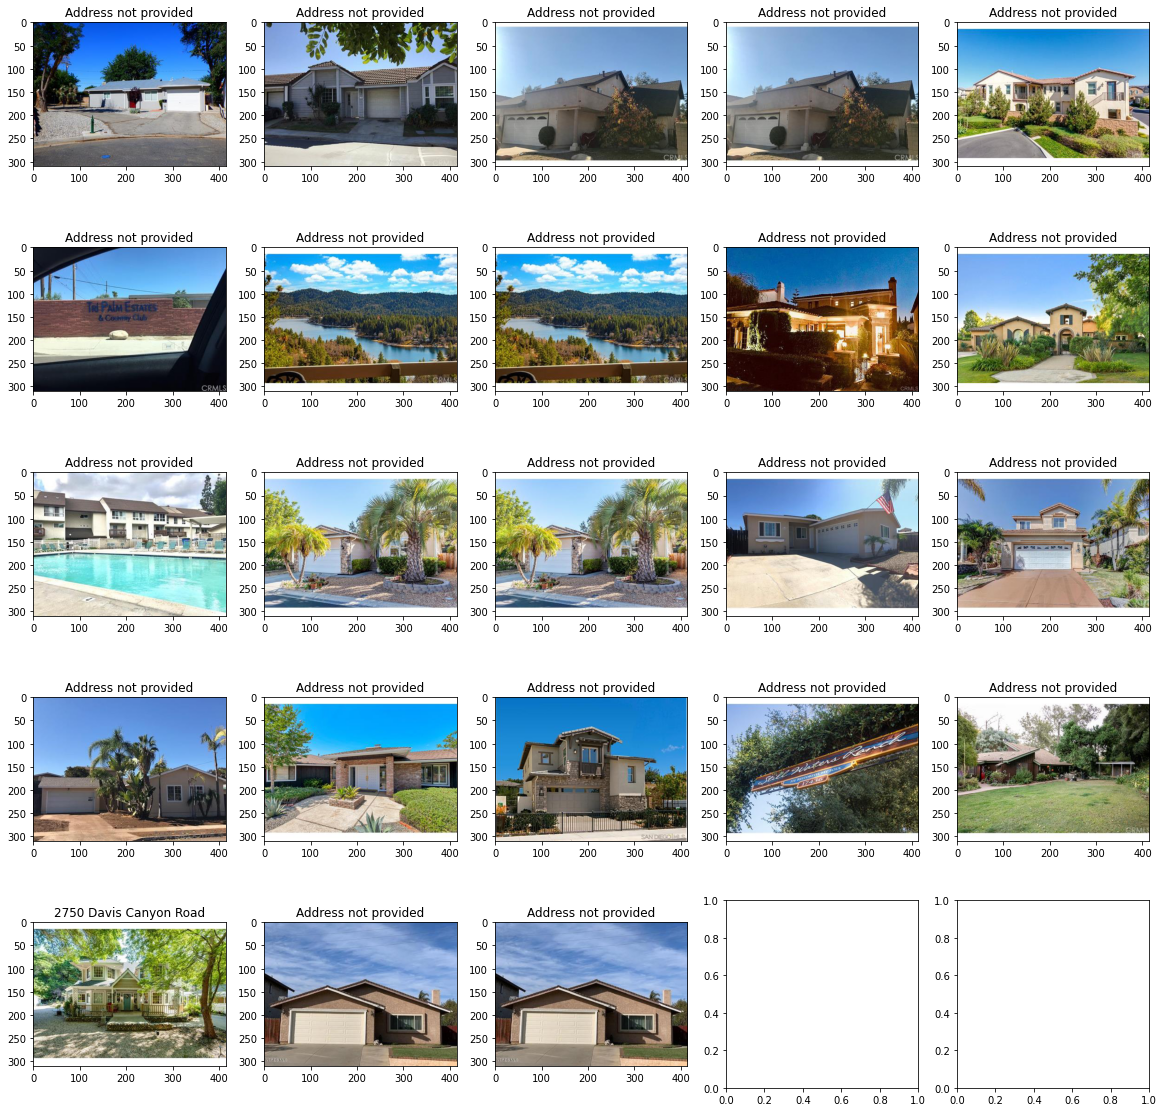

In [ ]:
fig, image = plt.subplots(5,5, figsize = (20,20))
for i in range(5):
    for j in range(5):
        if (i*5 + j) == len(no_address):
            break
        img = PIL.Image.open('/content/drive/My Drive/data/pics/' + str(no_address[i*5 + j]) + '.jpg')
        image[i][j].title.set_text(df['street'][no_address[i*5 + j]])
        image[i][j].imshow(img)


# **l2 regularization**

In [ ]:
df = df.drop(['city'], axis=1)
df = df.drop(['street'], axis=1)
df.head()

n_city  bed  sqft   price  fullbath  halfbath
image_id                                               
0            317    3  1560  201900         2         0
1             48    3   713  228500         2         0
2            152    3   800  273950         1         0
3             48    3  1082  350000         1         0
4             55    4  2547  385100         3         0

In [ ]:
x = df.drop(['price'],axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
model0 = Sequential()
# Hidden Layer
model0.add(Dense(30, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))
model0.add(Dense(30, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))
model0.add(Dense(20, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))
model0.add(Dense(20, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))
model0.add(Dense(10, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))
model0.add(Dense(10, activation="relu", kernel_regularizer = tf.keras.regularizers.l2()))

# Output
model0.add(Dense(1, kernel_regularizer = tf.keras.regularizers.l2()))


model0.compile(optimizer = 'adam', loss = tf.keras.losses.MeanAbsoluteError(), metrics = [tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanAbsoluteError()])

In [ ]:
history = model0.fit(X_train, y_train, validation_split=0.3, batch_size = 100, epochs = 20)

Epoch 1/20

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

65/65 [==============================] - 0s 7ms/step - loss: 700798.9375 - mean_absolute_percentage_error: 99.9998 - mean_absolute_error: 700798.0000 - val_loss: 696184.2500 - val_mean_absolute_percentage_error: 99.9991 - val_mean_absolute_error: 696183.3125
Epoch 2/20
65/65 [==============================] - 0s 4ms/step - loss: 700740.0625 - mean_absolute_percentage_error: 99.9886 - mean_absolute_error: 700739.3125 - val_loss: 695952.5000 - val_mean_absolute_percentage_error: 99.9544 - val_m

In [ ]:
model0.evaluate(X_test, y_test)

121/121 [==============================] - 0s 2ms/step - loss: 224811.8906 - mean_absolute_percentage_error: 34.5841 - mean_absolute_error: 224803.7812


[224811.890625, 34.5841064453125, 224803.78125]

In [ ]:
index = df.index
pictures_size = []
for i in range(len(index)):
    pictures_size.append(PIL.Image.open("pics/" + str(index[i]) + ".jpg").size)

print(set(pictures_size))

{(525, 350), (415, 311), (350, 350)}


number of different size pictures: 177


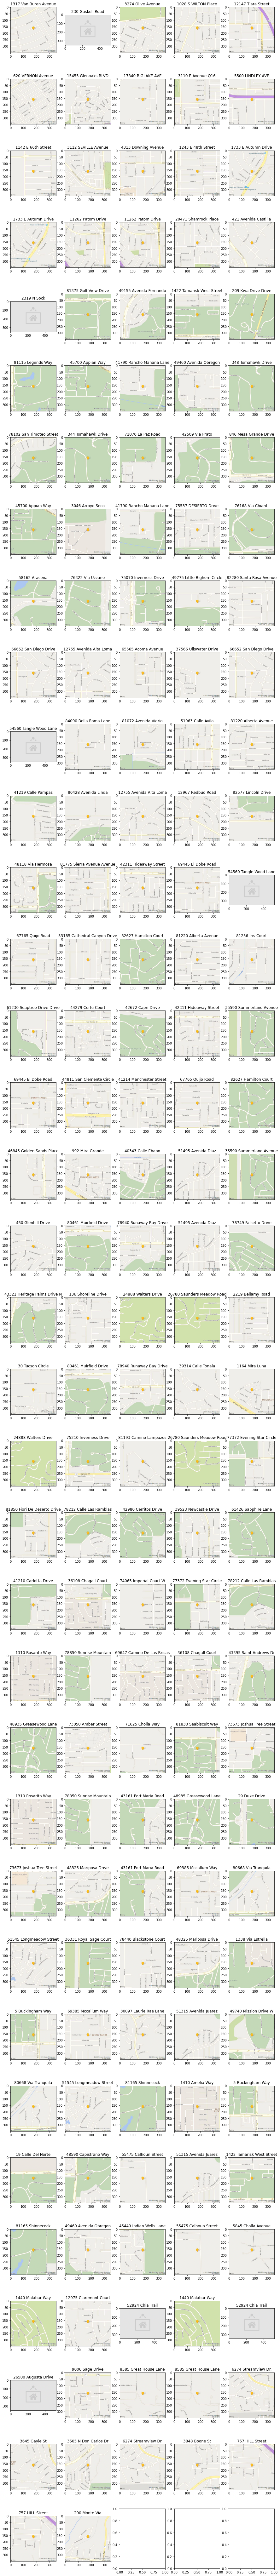

In [ ]:
nums = 0
index_list = []
for i in range(len(index)):
    if pictures_size[i] == (350, 350) or pictures_size[i] == (525, 350) :
        index_list.append(i)
        nums += 1

print('number of different size pictures:' , nums)
fig, images = plt.subplots(36,5, figsize = (15,150))
for i in range(36):
    for j in range(5):
        if (i*5 + j) == len(index_list):
            break
        img = PIL.Image.open('pics/' + str(index_list[i*5 + j]) + '.jpg')
        images[i][j].imshow(img)
        images[i][j].title.set_text(df['street'][index_list[i*5 + j]])

In [ ]:
df = df.drop(index_list)


In [ ]:
sizes = []
for i in range(len(df)):
    img = PIL.Image.open("pics/" + str(df.index[i]) + ".jpg")
    img = img.resize((100,100))
    img = np.array(img)
    img = img.astype('float32')
    img = (img - 128.0) / 128.0
    sizes.append([img.shape, df.index[i]])

index1_list = []
for i in range(len(sizes)):
    if sizes[i][0] !=  (100, 100, 3):
        index1_list.append(sizes[i][1])

print(len(index1_list))

In [ ]:
df = df.drop(index1_list)

In [ ]:
df = df.drop(['city'], axis=1)
df['street'] = pd.Categorical(df['street'])
df['street'] = df.street.cat.codes
x = df.drop(['price'],axis=1)
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(sc.fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
df.shape

In [ ]:
def image_text_generator(dataframe, target, batch_size = 100):
      while True:
          for i in range(1+int(len(dataframe)/batch_size)):
              img_X = []
              txt_X = []
              y = []
              for j in range(batch_size):
                  index = i*batch_size + j
                  if index < len(dataframe):
                      # Image part
                      address_index = dataframe.index[index]
                      img = PIL.Image.open('pics/' + str(address_index) + '.jpg')
                      img = img.resize((100,100))
                      img = np.array(img)
                      img = img.astype('float32')
                      img = (img - 128.0) / 128.0
                      img_X.append(img)
                      # Text Part
                      txt_X.append(dataframe.iloc[index].to_numpy())

                      # Target Part
                      y.append(target.iloc[index])

                  else:
                      break

              yield [np.array(img_X), np.array(txt_X)], np.array(y)

In [ ]:
# Model A
model1a = Sequential()
model1a.add(Dense(10, activation = 'relu', input_dim = 6))
model1a.add(Dense(10, activation = 'relu'))
model1a.add(Dense(10, activation = 'relu'))
model1a.add(Dense(10, activation = 'relu'))
model1a.add(Dense(10, activation = 'relu'))

# Model B
model1b = Sequential()
model1b.add(Conv2D(32,(5,5), activation = 'relu',  input_shape = (100,100,3)))
model1b.add(Conv2D(16,(5,5), activation='relu'))
model1b.add(MaxPooling2D())
model1b.add(Dropout(0.2))
model1b.add(Conv2D(64,(3,3), activation = 'relu'))
model1b.add(Conv2D(64,(3,3), activation = 'relu'))
model1b.add(MaxPooling2D())
model1b.add(Dropout(0.2))
model1b.add(Conv2D(128,(1,1), activation = 'relu'))
model1b.add(Conv2D(128,(1,1), activation = 'relu'))
model1b.add(MaxPooling2D())
model1b.add(Dropout(0.2))
model1b.add(Flatten())
model1b.add(Dense(128, activation="relu"))
model1b.add(Dense(64, activation="relu"))
model1b.add(Dropout(0.3))
model1b.add(Dense(32, activation="relu"))
model1b.add(Dense(10, activation="relu"))

# Merge Models
merged = concatenate([model1b.output, model1a.output])

merged = Dense(units = 20, activation = 'relu')(merged)
merged = Dropout(rate = 0.2)(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 15, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 10, activation = 'relu')(merged)
merged = BatchNormalization()(merged)
merged = Dense(units = 1, activation = 'softmax')(merged)


model1 = Model(inputs = [model1b.input, model1a.input], outputs = merged)

In [ ]:
model1.compile(optimizer = 'adam', loss = tf.keras.losses.MeanAbsoluteError(), metrics = [tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanAbsoluteError()])
callback = tf.keras.callbacks.EarlyStopping( monitor='val_mean_absolute_percentage_error', patience = 3)

In [ ]:
history1 = model1.fit(image_text_generator(X_train, y_train), steps_per_epoch = (1+int(len(X_train)/100)),validation_data = image_text_generator(X_validation, y_validation), validation_steps = (1+int(len(X_validation)/100)),epochs = 20)